# 3.  Visualization

## 3.1 Introduction
When you're new to Python, the amount of visualization libraries can be overwhelming. It's often a better choice to reflect on which type of graph you want to plot and choose the corresponding and appropriate library. In this we've chosen to dive into the Seaborn library. 

Generally you could summarize that **Matplotlib (pyplot)**  has great flexibility and versatility that comes with the cost of (sometimes) complexity and low-level type of programming. **Seaborn** is a Python data visualization library which is built on-top of Matplotlib and closely integrated with pandas data structures. It provides a higher-level wrapper on the library which makes it easier to create more aesthetically pleasing plots. However, it comes with the cost that it has its limitations. 

At the bottom of this chapter you'll find a bunch of references to blogs that did some comparisons between different libraries. 

## 3.2 Seaborn

An overview of the possible plots is accessible on the [documentation website](https://seaborn.pydata.org/examples/index.html). Many plots can be accomplished with only seaborn functions, however for non-conventional plots, further customization is possible using Matplotlib directly. 

Throughout this chapter we'll be using seaborn, pandas and some matplotlib's features to further modify our plots.

In [43]:
# Importing libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Some notebooks require the explicit setting of matplotlib inline to plot the graphs into the notebook
%matplotlib inline

### 3.2.1  Getting familiar with Seaborn
We will start exploring some lay-out options with line-plots.

For the first example, we're importing a dataset from [datahub.io](https://datahub.io/core/genome-sequencing-costs) containing the cost of genome sequencing throughout the years. We can import the dataset directly from the website using pandas `read_csv()` function. 

In [3]:
# Import the data
seqcost = pd.read_csv('data/sequencing_costs.csv', sep=',')

# Inspect the data
seqcost.head()

,Date,Cost per Mb,Cost per Genome
0,2001-09,5292.393,9.526307e+07
1,2002-03,3898.635,7.017544e+07
2,2002-09,3413.801,6.144842e+07
3,2003-03,2986.205,5.375168e+07
4,2003-10,2230.975,4.015755e+07


Making a graph that plots the Cost per Mb (y-axis) throughout the years (x-axis) is simply done with Seaborn's lineplot. The following is defined:
- x-axis: column name that contains the data for the x-axis = `'Date'` 
- y-axis: column name that contains the data for the y-axis = `'Cost per Mb'`
- dataset: name of the dataset = `seqcost` 

Note that the name of the x and y argument are not random. They share the identical name of the column names in the dataframe. 

In [ ]:
sns.lineplot(x = 'Date', y = 'Cost per Mb', data = seqcost)

The plot we just made doesn't really look like an aesthetic plot. In the next exercise we will learn how to modify the most important things in a plot. 

Drawing attractive figures is important. Visualizations are central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention. Besides the attractiveness, correctness is obviously even more important. Misleading data visualizations can lead to misinterpretations and false conclusions (examples [here](https://www.datapine.com/blog/misleading-data-visualization-examples/) and [here](https://learningsolutionsmag.com/articles/misleading-data-visualizations-can-confuse-deceive-learners)).  

---
### 3.2.1 Exercise 
Edit the lineplot above with the following adjustments:
- Set the style to a white background with ticks on the axes
- Set the context to a paper format
- Change the figure size
- Rename the axes and title of the plot 

Use the information here below to change the lay-out of the plot.

![Seq cost per Mb](img/seqcost.png)

---
### 3.2.2 Extra exercise
Make two subplots underneath each other that plot the Cost per Mb over years and the Total cost. 
Find more information on subplots [here](https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html).

![Subplots sequencing cost](img/subplots_seqcost.png)

The following workflow can help you with the right steps for plotting and lay-outing your plots:

--- 

```python
# 1. Import data
...

# 2. Set style of the plot
sns.set(...)
sns.set_style(...)
sns.set_context(...)
sns.color_palette(...)
sns.axes_style(...)

# 3. Define/create the plot
subplots and figsize
ax = sns.lineplot(...)

# 4. Tweak lay-out
ax.set(...)

# Save the figure with:
#ax.savefig()
```

---

**General style of the plot**:  
[`sns.set()`](https://seaborn.pydata.org/generated/seaborn.set.html) is the overarching method that sets aesthetic parameters in one step. Alternatively, choose one of the following methods to edit the general style of the plot:
- [`sns.set_style()`](https://seaborn.pydata.org/generated/seaborn.set_style.html) will set the background color of the graph. Examples are: *white*, *whitegrid* or *dark*. If you choose white you will see that it loses some structure, therefore it is possible to use *ticks* on the axes. 
- [`sns.set_context()`](https://seaborn.pydata.org/generated/seaborn.set_context.html) will basically scale your figure for usage in a *paper*, *poster*, *talk* or *notebook* (default). 
- [`sns.color_palettes()`](http://seaborn.pydata.org/tutorial/color_palettes.html) choose any of the color palettes defined in the link or make your own color palette. Options are: *pastel*, *deep*, *husl*, ...
- [`sns.axes_style()`](https://seaborn.pydata.org/generated/seaborn.axes_style.html#seaborn.axes_style) This affects things like the color of the axes, whether a grid is enabled by default, and other aesthetic elements.



**Define the plot**:  
- First define the figure size and/or subplots. Note that this is done at the matplotlib level: `f = plt.figure(figsize=(10,4))` or `f, ax = plt.subplot(1, 1, figsize=(10,4))` 
- Use any of [Seaborn's plots](https://seaborn.pydata.org/examples/index.html)

**Additional tweaking of axes**:  
Further modifications are possible on the matplotlib level by using `ax.set()` with a list of parameters. Refer to the [official documentation](https://matplotlib.org/3.3.0/api/axes_api.html) for a list of all possibilities. However it's also possible to define them individually using [pyplots methods](https://matplotlib.org/3.1.1/api/pyplot_summary.html). Here are some that you might find interesting:
- `plt.title`
- `plt.xlabel` and `plt.ylabel`
- `plt.xlim` and `plt.ylim`
- `plt.xscale` and `plt.yscale`
- `plt.legend`

### 3.2.2 Lineplot  
The next example elaborates on lineplots with a new dataset. This dataset is also retrieved from GitHub ([here](https://github.com/datasets/pharmaceutical-drug-spending)) and contains the spendings of a bunch of countries in pharmaceutical as from xxxx. The dataset is available in the data folder. 

In [5]:
# Download data from datahub.io. 
pharma = pd.read_csv('data/pharmaspending.csv')

# Inspect the data
pharma.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,AUS,1971,15.992,0.727,35.720,NaN,462.11
1,AUS,1972,15.091,0.686,36.056,NaN,475.11
2,AUS,1973,15.117,0.681,39.871,NaN,533.47
3,AUS,1974,14.771,0.755,47.559,NaN,652.65
4,AUS,1975,11.849,0.682,47.561,NaN,660.76


Often we are interested in the average value of one variable as a function of other variables. Many seaborn functions can automatically perform the statistical estimation and plot it on your graph. 

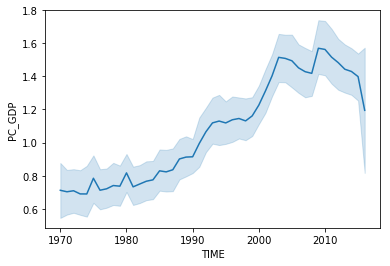

In [6]:
# Make a lineplot of the percentage of GDP over time
ax = sns.lineplot(x = 'TIME', y = 'PC_GDP', data = pharma)

This is the lineplot for the percentage of GDP for all the countries in this dataframe. We can make a subselection of this dataframe that contains the data for Belgium and its neibhouring countries (excl. Luxemburg and UK): France, Germany and the Netherlands. 

In [7]:
# Make empty dataframe
sub_pharma = pd.DataFrame()

# Countries of interest
countries = ['BEL', 'FRA', 'DEU', 'NLD']

# Make subselection dataframe with the data of the countries of interest
for country in countries:
    sub_pharma = sub_pharma.append(pharma.loc[pharma['LOCATION'] == country], ignore_index=True)
    
sub_pharma.head()

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND
0,BEL,1970,28.113,1.078,41.918,NaN,404.74
1,BEL,1971,28.275,1.109,46.908,NaN,453.75
2,BEL,1972,27.629,1.126,52.105,NaN,506.00
3,BEL,1973,27.547,1.200,61.916,NaN,603.17
4,BEL,1974,26.779,1.183,69.147,NaN,675.73


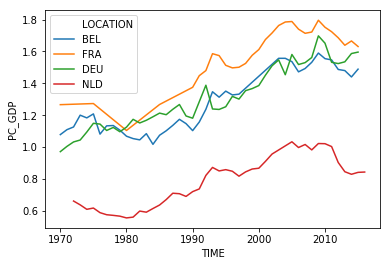

In [9]:
# Make a lineplot of the percentage of GDP over time
ax = sns.lineplot(x = 'TIME', y = 'PC_GDP', data = sub_pharma, hue='LOCATION')

More complex datasets will have multiple measurements for the same value of the x variable. The default behavior in seaborn is to aggregate the multiple measurements at each x value by plotting the mean and the 95% confidence interval around the mean:



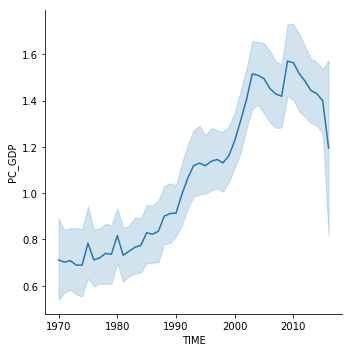

In [8]:
ax = sns.relplot(x = 'TIME', y = 'PC_GDP', kind="line", data = pharma)

### 3.2.3 Barplot

Take the sum of all spendings from oldest until the most recent spendings (TOTAL_SPEND) and make a barplot. Notice that this is may lead to misinterpretation and plot the spendings per capita. 

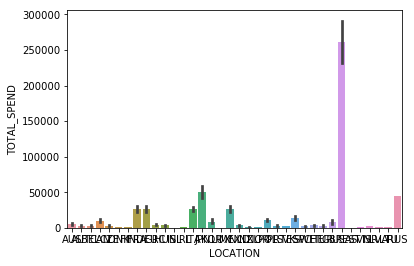

In [10]:
ax = sns.barplot(x = 'LOCATION', y = 'TOTAL_SPEND', data = pharma)

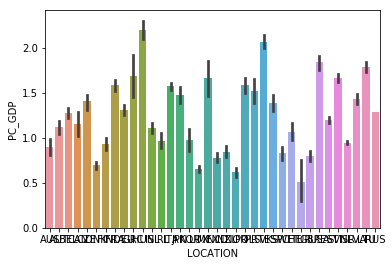

In [11]:
ax = sns.barplot(x = 'LOCATION', y = 'PC_GDP', data = pharma)

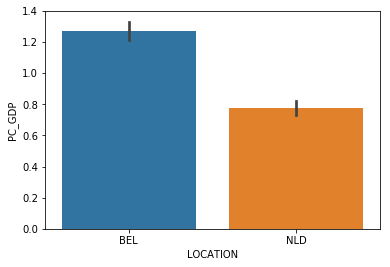

In [12]:
ax = sns.barplot(x = 'LOCATION', y = 'PC_GDP', data = sub_pharma, order=["BEL", "NLD"])

Additional parameters: 
- Use median as the estimate of central tendency: `estimator=median` (from numpy import median)
- Show the standard error of the mean with the error bars: `ci=68`
- Show standard deviation of observations instead of a confidence interval: `ci="sd"` 
- Add “caps” to the error bars: `capsize=.2`
- Use a different color palette for the bars: `palette="Blues_d"`

### 3.2.4 Multiplot grids
Seaborn also easily allows you to visualize pairwise relationships and marginal distributions. The iris dataset is the perfect dataset for showing this:

In [14]:
# We'll be working with the famously known iris dataset to make some seaborn plots. 
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


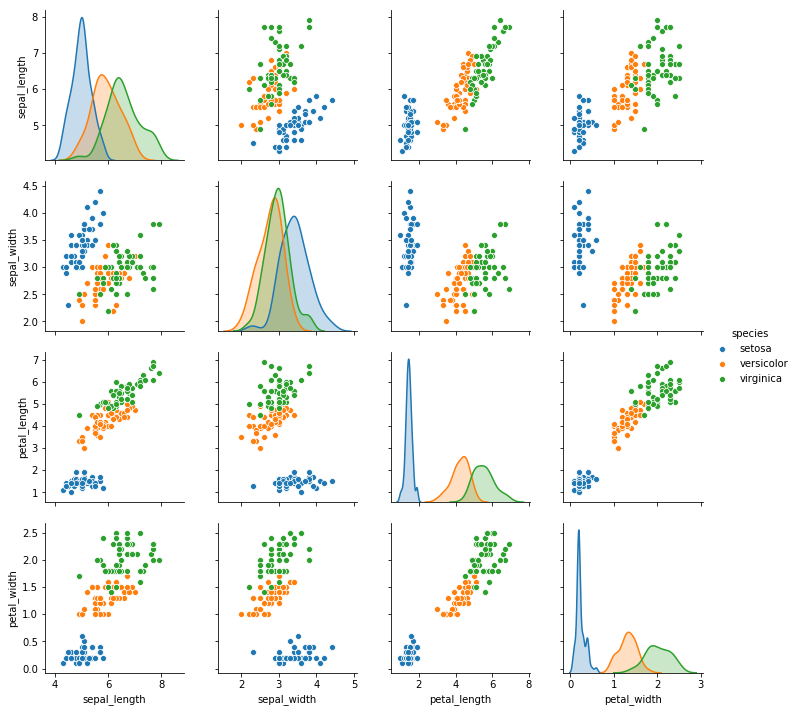

In [15]:
sns.pairplot(data=iris, hue="species");

In [16]:
fmri = sns.load_dataset("fmri")
fmri.head(20)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557


In [17]:
annotations = pd.read_csv('data/annotation.csv')
annotations["total"] = annotations.sum(axis = 1)
annotations = annotations.sort_values("total", ascending = False)

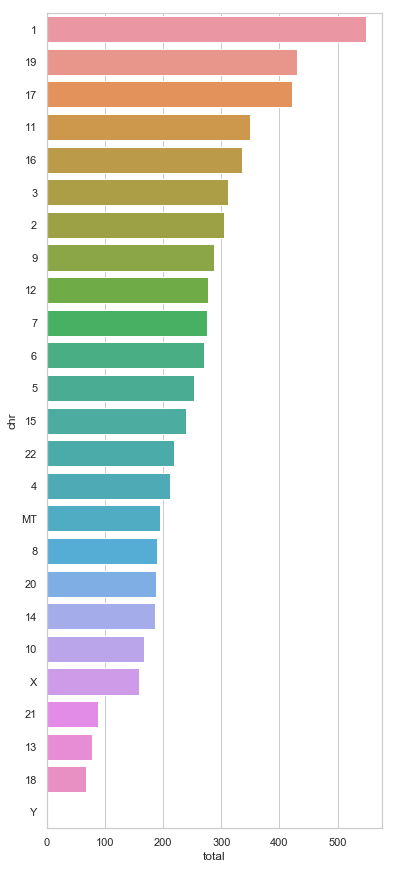

In [37]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 15))
sns.barplot(x= "total", y="chr", data= annotations)

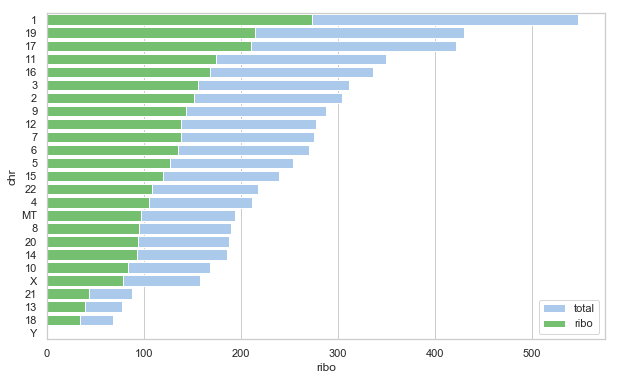

In [36]:
# Define colorstyle
sns.set_color_codes("pastel")

# Define figure size
f, ax = plt.subplots(figsize=(10,6))

# First bar
sns.barplot(x= "total", y="chr", data= annotations, label = "total", color = 'b')
# Second bar
sns.barplot(x="ribo",y="chr", data= annotations, label = "ribo", color="g")

# Add a legend and informative axis label
ax.legend(loc = "lower right")


### 3.2.5 Scatter plot (Volcano plot)
Another useful plot in differential expression analysis (RNA-seq) is a volcano plot. Essentially, a volcano plot is a scatter plot and can also be approached from this perspective in Seaborn logic. The data for this experiment is retrieved from the GTN tutorial "RNA Seq Counts to Viz in R" ([link](https://galaxyproject.github.io/training-material/topics/transcriptomics/tutorials/rna-seq-counts-to-viz-in-r/tutorial.html)).

A volcano plot shows statistical significance (P-value) versus magnitude of change (fold change). The most upregulated genes are towards the right, the most downregulated genes are towards the left, and the most statistically significant genes are towards the top. With this plot, we can then quickly identify genes with large fold changes that are also statistically significant, i.e. probably the most biologically significant genes.

In [55]:
# Import dataset
volc = pd.read_csv('data/annotatedDEgenes.tabular',sep='\t')
volc.head()

,GeneID,Base mean,log2(FC),StdErr,Wald-Stats,P-value,P-adj,Chromosome,Start,End,Strand,Feature,Gene name
0,FBgn0039155,1086.974295,-4.148450,0.134949,-30.740913,1.617357e-207,1.387207e-203,chr3R,24141394,24147490,+,protein_coding,Kal1
1,FBgn0003360,6409.577128,-2.999777,0.104345,-28.748637,9.419922e-182,4.039734e-178,chrX,10780892,10786958,-,protein_coding,sesB
2,FBgn0026562,65114.840564,-2.380164,0.084327,-28.225437,2.850430e-175,8.149380e-172,chr3R,26869237,26871995,-,protein_coding,BM-40-SPARC
3,FBgn0025111,2192.322369,2.699939,0.097945,27.565978,2.847517e-167,6.105789e-164,chrX,10778953,10786907,-,protein_coding,Ant2
4,FBgn0029167,5430.067277,-2.105062,0.092547,-22.745964,1.573284e-114,2.698811e-111,chr3L,13846053,13860001,+,protein_coding,Hml


The P-value needs to be log10 transformed. Notice that the datatype of the values in the DataFrame are interpreted as `numpy.float64`. 

In [56]:
type(volc['P-value'][0])

numpy.float64

In the following code block we will add the log10 transformed P-values

In [57]:
volc['Log10 P-value'] = -np.log10(volc['P-value'])
volc.head()

,GeneID,Base mean,log2(FC),StdErr,Wald-Stats,P-value,P-adj,Chromosome,Start,End,Strand,Feature,Gene name,Log10 P-value
0,FBgn0039155,1086.974295,-4.148450,0.134949,-30.740913,1.617357e-207,1.387207e-203,chr3R,24141394,24147490,+,protein_coding,Kal1,206.791194
1,FBgn0003360,6409.577128,-2.999777,0.104345,-28.748637,9.419922e-182,4.039734e-178,chrX,10780892,10786958,-,protein_coding,sesB,181.025953
2,FBgn0026562,65114.840564,-2.380164,0.084327,-28.225437,2.850430e-175,8.149380e-172,chr3R,26869237,26871995,-,protein_coding,BM-40-SPARC,174.545090
3,FBgn0025111,2192.322369,2.699939,0.097945,27.565978,2.847517e-167,6.105789e-164,chrX,10778953,10786907,-,protein_coding,Ant2,166.545534
4,FBgn0029167,5430.067277,-2.105062,0.092547,-22.745964,1.573284e-114,2.698811e-111,chr3L,13846053,13860001,+,protein_coding,Hml,113.803193


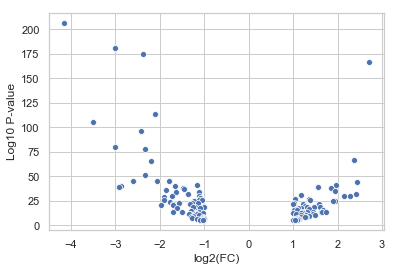

In [59]:
sns.scatterplot(x='log2(FC)', y='Log10 P-value', data=volc)

Color the scatter points according to the strandedness

Text(0, 0.5, '-log10(P-Value)')

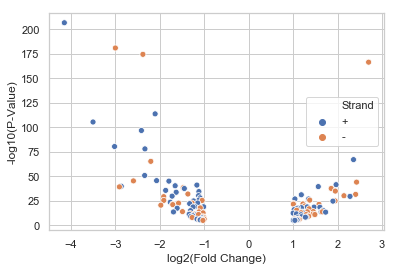

In [61]:
sns.color_palette('pastel')
ax = sns.scatterplot(x='log2(FC)', y='Log10 P-value', data=volc, hue='Strand')
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(P-Value)')

For the sake of giving another example, we'll show here how we can plot the same graph using the visualization library `Plotly`. Plotly allows interactive visualizations.

In [47]:
# Importing the library
import plotly.express as px

In [48]:
# Define dataset, x- and y-axis, color based on column values and add another label when hovering over the data.
fig = px.scatter(volc, x='log2(FC)', y='P-value', color='Strand', hover_data=['GeneID'])
fig.show()

### 3.2.6 Heatmap
This exercises is the sequel of exercise 2.5.4 in the previous chapter. In this exercise, derived from the GTN, we will plot  the data that we cleaned in the previous chapter to create a heatmap of the top differentially expressed genes in an RNA-seq counts dataset.    

In [63]:
# 1. Import data & Prepare the data (note the index)
heatmap_df = pd.read_csv('data/heatmap_data.csv', index_col=0)
heatmap_df.head()

,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
SYMBOL_x,,,,,,,,,,,,
Ggt1,6.732347,6.556047,6.558849,6.586562,6.437596,6.394067,5.193118,5.526432,4.223990,4.341605,7.243899,7.354535
Slc39a4,2.722153,3.027691,2.175532,1.993214,-0.193255,-0.016902,3.071502,2.928202,6.472918,6.526836,2.430346,1.847241
Ppl,5.102274,4.900942,5.755087,5.951023,6.851420,6.881858,7.359977,7.732010,8.227118,8.437499,4.646145,4.798986
Slc25a1,4.881465,4.574209,4.407566,4.365098,4.983846,5.116211,5.011037,4.868608,5.702613,5.747631,9.713845,9.984259
St6gal1,5.696711,5.711296,5.040603,4.792001,4.244151,4.580588,3.727488,3.453293,6.954809,7.070749,9.810738,9.909301


It's important that the gene names are the row indeces and the names of the experiments are the column indeces. Besides the indeces, also a normalization will be necessary in order to allow a better interpretation. This normalization is a standard procedure in creating heatmaps and is done by using z-scores. 

In [65]:
# Importing statistical library from scipy for calculating z-scores
from scipy import stats 

In [66]:
# Data scaling by row (scale genes) with zscores
for row in range(len(heatmap_df)):
    heatmap_df.iloc[row] = stats.zscore(heatmap_df.iloc[row])
    
heatmap_df

,MCL1.DG,MCL1.DH,MCL1.DI,MCL1.DJ,MCL1.DK,MCL1.DL,MCL1.LA,MCL1.LB,MCL1.LC,MCL1.LD,MCL1.LE,MCL1.LF
SYMBOL_x,,,,,,,,,,,,
Ggt1,0.639248,0.462214,0.465027,0.492855,0.343268,0.299558,-0.906401,-0.571698,-1.879572,-1.761467,1.152935,1.264032
Slc39a4,-0.013535,0.141718,-0.291290,-0.383932,-1.494946,-1.405336,0.163980,0.091165,1.892348,1.919745,-0.161812,-0.458106
Ppl,-0.975664,-1.128559,-0.479907,-0.331110,0.352667,0.375782,0.738874,1.021402,1.397396,1.557162,-1.322056,-1.205986
Slc25a1,-0.481267,-0.645892,-0.735178,-0.757932,-0.426412,-0.355492,-0.411843,-0.488155,-0.041302,-0.017182,2.107884,2.252770
St6gal1,-0.106276,-0.099207,-0.424284,-0.544778,-0.810315,-0.647248,-1.060735,-1.193635,0.503510,0.559704,1.887745,1.935518
Cidea,-1.214343,-1.458511,-0.655924,-0.577451,-0.100889,-0.158683,-0.402130,-0.247095,0.490305,0.666513,1.814409,1.843798
Scd1,-1.140442,-1.227834,-0.642568,-0.803341,-0.361135,-0.357789,-0.266487,-0.264118,0.672328,0.709615,1.817874,1.863898
Pmvk,-0.959506,-0.776169,-0.643179,-0.584189,0.197575,-0.000096,-0.545673,-0.534742,-0.191228,-0.209421,2.092732,2.153894
Elovl6,-0.846462,-0.839423,-0.563614,-0.702352,0.101406,0.097357,-0.118487,-0.456719,-0.370647,-0.560162,2.176312,2.082792


[Text(66.453125, 0.5, 'Genes'),
 Text(0.5, 66.5, 'Samples'),
 Text(0.5, 1.0, 'Heatmap of DE genes')]

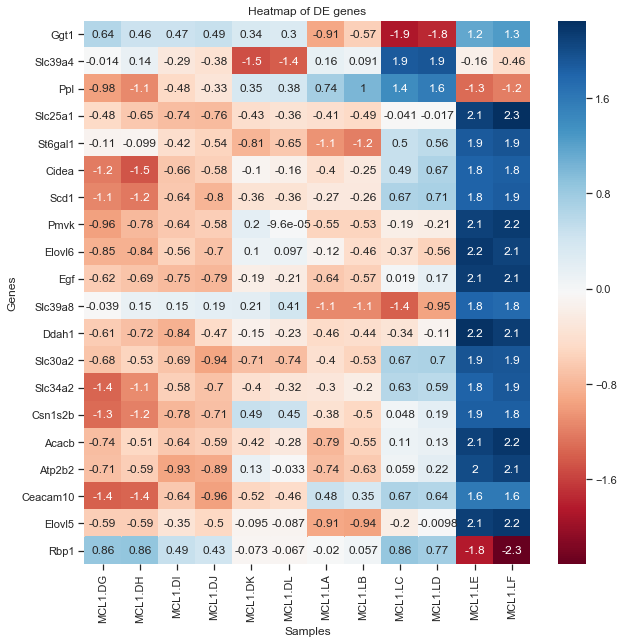

In [67]:
# 2. Set style of the plot
sns.set_style("ticks")
sns.color_palette("deep")

# 3. Define/create the plot
f = plt.figure(figsize=(10,10))
ax = sns.heatmap(heatmap_df, cmap="RdBu", annot=True)

# 4. Tweak lay-out
ax.set(xlabel='Samples', ylabel='Genes', title='Heatmap of DE genes')

## 3.3 Exercises
We'll experiment further with Pandas and Seaborn using the publicly available Covid-19 datasets provided by the Belgian national health institute Sciensano. The data is accessible following [this link](https://epistat.wiv-isp.be/covid/). Here are some plotting ideas; can you create a graph with...:
- Casualties by age and sex
- Progress of cases (hospitalization) per province over time
- Number of tests over time
- Relation between cases and tests. 

Try to map the Belgian cases on a map using the Plotly library. Here is a good hint: https://colab.research.google.com/drive/1vTdhtYk1H7KyPrpL-5NEFzstwAcglt_F#scrollTo=BboAWwU_TqQ_

## 3.x Further reading
- https://mode.com/blog/python-data-visualization-libraries
- https://pbpython.com/visualization-tools-1.html
- https://www.dataquest.io/blog/python-data-visualization-libraries/
- https://lisacharlotterost.de/2016/05/17/one-chart-code/